## Lab 3

In this lab we will become familiar with distributions, histograms, and functional programming. Before that, lets submit your Quiz from last lecture. Do not use numpy or any other library for this lab. 

### Quiz Submission

The instructions here aim to have our course repository be public (enabling things like the colab links), while student repositories are private. You should be familiar with git from the first semester of this course. I assume that you all have github accounts and have setup things to be able to [push to github using ssh](https://docs.github.com/en/github/authenticating-to-github/connecting-to-github-with-ssh). The instuctions here lead you to:

1. Create a directory on your personal system where you will keep all course materials.
1. Clone the [course repository](https://github.com/UTA-DataScience/DATA3402.Fall.2023).
1. Create a new private repository for your solutions. 
1. Copy lab notebooks from course repository to your solutions repository.
1. Commit / push your solutions.
1. Grant access to course instructors.

Ideally, you should be able to do all of these steps yourself. Below are step by step instructions with examples (including example directory naming convention). Feel free to modify things as you see fit. The goal here to have a private repo where you can submit your solutions. 

1. Open a shell on your personal computer.
1. If you have not done so already, create a new directory/folder where you will keep all course material to navigate to it. For example: `mkdir Data-3402` and `cd Data-3402`.
1. Clone the course repository: `git clone https://github.com/UTA-DataScience/DATA3402.Fall.2023`.
   1. Note that after the this clone, you simply need to navigate to this directory and do `git pull` to get updates (e.g. new labs).
1. Make a new directory for your solutions and navigate to it: `mkdir DATA3402.Solutions.$USER` and `cd  DATA3402.Solutions.$USER`
1. Make new directory for Labs and Lab 2: `mkdir Labs ; mkdir Labs/Labs.2`.
1. Place your Quiz 1 solutions it this directory: `cp <path_to_solution> Labs/Labs.2 `
   1. For Lab 2 and the future labs, just copy labs from the class repo, for example here: 
      * `mkdir Labs/Lab.3`
      * `cp ../DATA3402.Fall.2023/Labs/Lab.3/Lab.3.ipynb Labs/Lab.3`
1. Create a new git repository with same name are your directory above (i.e. `DATA3402.Solutions.$USER`). 
   * Navigate to your page on github.
   * Use the "+" button to create a new repository.
   * Make sure your repository is private.
   * github will give you instructions on "create a new repository on the command line"
1. After creating the repository, go to the repository settings tab, select "Manage access" on left, and press "Invite a collaborator" to invite course instructor (username `afarbin`). You'll do the same for our TA, once we have one for this course.
1. To submit your labs, navigate to your private repo and 
   1. Make sure you have added the lab. For example: `git add Labs/Lab.2/Lab.2.ipynb`
   1. Commit any changes: `git commit -a -m "Lab 2 updates"`
   1. Push your changes: `git push`
   1. Check on github that your solutions have been properly submitted.
   
   
After submitting Quiz 1, continue work on lab 2, or start the remainder of this lab...

### Uniform Distribution
Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [1]:
import random
x=random.random()
print("The Value of x is", x)

The Value of x is 0.8828854319847991


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [4]:
# Skeleton
def generate_uniform(N,x_min,x_max):
    random_numbers = [random.uniform(x_min,x_max)]
    return random_numbers
    ### BEGIN SOLUTION

    # Fill in your solution here        
    
    ### END SOLUTION

In [5]:
N = 10
x_min = 1
x_max = 10
result = generate_uniform(N, x_min, x_max)
print(result)

[1.161351356536454]


*Exercise 2a:* 
Write a function that computes the mean of values in a list. Recall the equation for the mean of a random variable $\bf{x}$ computed on a data set of $n$ values $\{ x_i \} = \{x_1, x_2, ..., x_n\}$  is ${\bf\bar{x}} = \frac{1}{n} \sum_i^n x_i$.

In [6]:
# Skeleton
def mean(Data):
    if not Data:
        return None 
    total = sum(Data)
    mean = total/len(Data)
    return mean
    
    ### BEGIN SOLUTION

    # Fill in your solution here        
    
    ### END SOLUTION
    
  

In [8]:
# Test your solution here
values = [3, 6, 9, 12, 15]
mean_value = mean(values)
print("Mean:", mean_value)

Mean: 9.0


*Exercise 2b:* 
Write a function that computes the variance of values in a list. Recall the equation for the variance of a random variable $\bf{x}$ computed on a data set of $n$ values $\{ x_i \} = \{x_1, x_2, ..., x_n\}$  is ${\bf\langle x \rangle} = \frac{1}{n} \sum_i^n (x_i - {\bf\bar{x}})$.

In [14]:
# Skeleton
def variance(data):
    if not data:
        return none
    mean = sum(data)/len(data)
    squared_diff = [(x - mean)**2 for x in data]
    variance = sum(squared_diff)/len(values)
    return variance 
    
    
    
    ### BEGIN SOLUTION

    # Fill in your solution here        
    
    ### END SOLUTION
    


In [15]:
# Test your solution here
data = [3, 6, 9, 12, 15]
variance_value = variance(data)
print("Variance:", variance_value)

Variance: 18.0


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

In [1]:
def create_histogram(x, n_bins=10):
    x_min, x_max = min(x), max(x)
    bin_size = (x_max - x_min)/n_bins
    hist = [0]*n_bins
    
    bin_edges= [x_min + i*bin_size for i in range(n_bins)]
    bin_edges.append(x_max)
    
    for value in x:
        for i in range(n_bins):
            if x_min + i*bin_size <= value < x_min + (i+1)*bin_size:
                hist[i]+=1
                break 
    return hist, bin_edges

In [2]:
# Test your solution here
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
histogram, bin_edges = create_histogram(data, n_bins=5)
print("Histogram:", histogram)
print("Bin Edges:", bin_edges)

Histogram: [2, 2, 2, 2, 1]
Bin Edges: [1.0, 2.8, 4.6, 6.4, 8.2, 10]


*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin. 

In [5]:
# Solution
def plot_histogram(histogram, bin_edges):
    max_count = max(histogram)
    bin_width = bin_edges[1] - bin_edges[0]
    
    for count, bin_edge in zip(histogram, bin_edges[:-1]):
        bar = '#' * int((count /max_count)*50)
        print(f"{bin_edge:.2f} - {bin_edge + bin_width:.2f} | {bar} ({count})")

        

In [6]:
# Test your solution here
data = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
histogram, bin_edges = create_histogram(data, n_bins=5)
plot_histogram(histogram, bin_edges)

1.00 - 2.80 | ################################################## (2)
2.80 - 4.60 | ################################################## (2)
4.60 - 6.40 | ################################################## (2)
6.40 - 8.20 | ################################################## (2)
8.20 - 10.00 | ######################### (1)


## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5. 

In [7]:
def find_indices(data, boolean_function):
    true_indices = [i for i, value in enumerate(data) if boolean_function(value)]
    return true_indices

def is_greater_than_half(value):
    return value > 0.5

In [8]:
data = [0.2, 0.6, 0.3, 0.8, 0.7, 0.1]
indices = find_indices(data, is_greater_than_half)
print("Indices of entries greater than 0.5:", indices)

Indices of entries greater than 0.5: [1, 3, 4]


*Exercise 6:* The `inrange(mymin,mymax)` function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [9]:
def inrange(mymin, mymax):
    def is_in_range(x):
        return mymin <= x <= mymax
    return is_in_range

def even():
    def is_even(x):
        return x % 2 == 0
    return is_even

def odd():
    def is_odd(x):
        return x % 2 != 0
    return is_odd

def greater_than(value):
    def is_greater_than(x):
        return x > value
    return is_greater_than

def less_than(value):
    def is_less_than(x):
        return x < value
    return is_less_than

def equal(value):
    def is_equal(x):
        return x == value
    return is_equal

def divisible_by(divisor):
    def is_divisible_by(x):
        return x % divisor == 0
    return is_divisible_by

In [10]:
is_in_1_to_5 = inrange(1, 5)
is_even_func = even()
is_odd_func = odd()
is_greater_than_10 = greater_than(10)
is_less_than_20 = less_than(20)
is_equal_to_15 = equal(15)
is_divisible_by_3 = divisible_by(3)

values = [2, 4, 6, 7, 10, 12, 15]

for value in values:
    print(f"{value}:")
    print("In range (1 to 5):", is_in_1_to_5(value))
    print("Even:", is_even_func(value))
    print("Odd:", is_odd_func(value))
    print("Greater than 10:", is_greater_than_10(value))
    print("Less than 20:", is_less_than_20(value))
    print("Equal to 15:", is_equal_to_15(value))
    print("Divisible by 3:", is_divisible_by_3(value))
    print()

2:
In range (1 to 5): True
Even: True
Odd: False
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: False

4:
In range (1 to 5): True
Even: True
Odd: False
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: False

6:
In range (1 to 5): False
Even: True
Odd: False
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: True

7:
In range (1 to 5): False
Even: False
Odd: True
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: False

10:
In range (1 to 5): False
Even: True
Odd: False
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: False

12:
In range (1 to 5): False
Even: True
Odd: False
Greater than 10: True
Less than 20: True
Equal to 15: False
Divisible by 3: True

15:
In range (1 to 5): False
Even: False
Odd: True
Greater than 10: True
Less than 20: True
Equal to 15: True
Divisible by 3: True



In [ ]:
# Test your solution

*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above. 

In [11]:
def inrange(mymin, mymax):
    return lambda x: mymin <= x <= mymax

even = lambda x: x % 2 == 0
odd = lambda x: x % 2 != 0

greater_than = lambda value: lambda x: x > value
less_than = lambda value: lambda x: x < value
equal = lambda value: lambda x: x == value
divisible_by = lambda divisor: lambda x: x % divisor == 0

In [12]:
is_in_1_to_5 = inrange(1, 5)
is_even_func = even
is_odd_func = odd
is_greater_than_10 = greater_than(10)
is_less_than_20 = less_than(20)
is_equal_to_15 = equal(15)
is_divisible_by_3 = divisible_by(3)

values = [2, 4, 6, 7, 10, 12, 15]

for value in values:
    print(f"{value}:")
    print("In range (1 to 5):", is_in_1_to_5(value))
    print("Even:", is_even_func(value))
    print("Odd:", is_odd_func(value))
    print("Greater than 10:", is_greater_than_10(value))
    print("Less than 20:", is_less_than_20(value))
    print("Equal to 15:", is_equal_to_15(value))
    print("Divisible by 3:", is_divisible_by_3(value))
    print()

2:
In range (1 to 5): True
Even: True
Odd: False
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: False

4:
In range (1 to 5): True
Even: True
Odd: False
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: False

6:
In range (1 to 5): False
Even: True
Odd: False
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: True

7:
In range (1 to 5): False
Even: False
Odd: True
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: False

10:
In range (1 to 5): False
Even: True
Odd: False
Greater than 10: False
Less than 20: True
Equal to 15: False
Divisible by 3: False

12:
In range (1 to 5): False
Even: True
Odd: False
Greater than 10: True
Less than 20: True
Equal to 15: False
Divisible by 3: True

15:
In range (1 to 5): False
Even: False
Odd: True
Greater than 10: True
Less than 20: True
Equal to 15: True
Divisible by 3: True



## Monte Carlo

*Exercise 7:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number `test_x` within the specified range and another number `p` between the `min` and `max` of the function (which you will have to determine). If `p<=function(test_x)`, then place `test_x` on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, `N`. For this problem, it's OK to determine the `min` and `max` by numerically sampling the function.  

In [13]:
import random

def generate_function(func, x_min, x_max, N):
    generated_values = []
    min_y = max_y = func(x_min)
    
    for _ in range(N):
        while True:
            test_x = random.uniform(x_min, x_max)
            p = random.uniform(min_y, max_y)
            
            if p <= func(test_x):
                generated_values.append(test_x)
                break
        min_y = min(min_y, func(test_x))
        max_y = max(max_y, func(test_x))
    
    return generated_values



In [15]:
# A test function
def test_func(x):
    mu = 5.0
    sigma = 1.0
    return 1.0 / (sigma * (2 * 3.14159)**0.5) * \
           2.71828**(-0.5 * ((x - mu) / sigma)**2)

N = 1000  # Number of generated values
x_min = 0
x_max = 10
generated_values = generate_function(test_func, x_min, x_max, N)

histogram, bin_edges = create_histogram(generated_values, n_bins=20)
plot_histogram(histogram, bin_edges)


1.07 - 1.43 |  (1)
1.43 - 1.79 |  (2)
1.79 - 2.15 |  (1)
2.15 - 2.52 |  (2)
2.52 - 2.88 | ##### (14)
2.88 - 3.24 | ########## (29)
3.24 - 3.60 | ################## (51)
3.60 - 3.96 | ##################### (59)
3.96 - 4.33 | ##################################### (105)
4.33 - 4.69 | ################################################ (135)
4.69 - 5.05 | ################################################## (140)
5.05 - 5.41 | ############################################## (129)
5.41 - 5.77 | ####################################### (110)
5.77 - 6.14 | ################################## (97)
6.14 - 6.50 | ##################### (61)
6.50 - 6.86 | ######## (24)
6.86 - 7.22 | ####### (20)
7.22 - 7.58 | #### (12)
7.58 - 7.95 | # (5)
7.95 - 8.31 |  (2)


*Exercise 8:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data. 

Specified Mean: 0, Generated Mean: -0.00276855801622105
Specified Variance: 1, Generated Variance: 0.8791781435706553


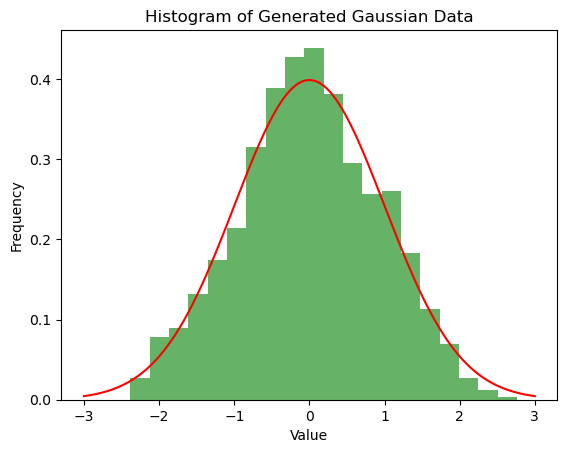

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return 1.0 / (sigma * (2 * np.pi)**0.5) * np.exp(-0.5 * ((x - mu) / sigma)**2)
N = 1000
x_min = -3
x_max = 3

mu = 0
sigma = 1
generated_values = generate_function(lambda x: gaussian(x, mu, sigma), x_min, x_max, N)

mean_generated = np.mean(generated_values)
variance_generated = np.var(generated_values)

print(f"Specified Mean: {mu}, Generated Mean: {mean_generated}")
print(f"Specified Variance: {sigma**2}, Generated Variance: {variance_generated}")

histogram, bin_edges = create_histogram(generated_values, n_bins=20)

plt.hist(generated_values, bins=bin_edges, density=True, alpha=0.6, color='g')
plt.plot(np.linspace(x_min, x_max, 1000), [gaussian(x, mu, sigma) for x in np.linspace(x_min, x_max, 1000)], 'r')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Generated Gaussian Data")
plt.show()


*Exercise 9:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [17]:
import random

def generate_function(func, x_min, x_max, N):
    generated_values = []
    min_y = max_y = func(x_min)
    
    for _ in range(N):
        while True:
            test_x = random.uniform(x_min, x_max)
            p = random.uniform(min_y, max_y)
            
            if p <= func(test_x):
                generated_values.append(test_x)
                break
                
        min_y = min(min_y, func(test_x))
        max_y = max(max_y, func(test_x))
    
    return generated_values

def where(func, data):
    return [x for x in data if func(x)]

def inrange(mymin, mymax):
    return lambda x: mymin <= x <= mymax

def integrate(func, x_min, x_max, N=10000):
    generated_values = generate_function(func, x_min, x_max, N)
    in_range_values = where(inrange(x_min, x_max), generated_values)
    return len(in_range_values) / N

# Gaussian function
def gaussian(x, mu, sigma):
    return 1.0 / (sigma * (2 * 3.14159)**0.5) * 2.71828**(-0.5 * ((x - mu) / sigma)**2)

# Calculate the area under the Gaussian curve within one standard deviation
mu = 0
sigma = 1
x_min = mu - sigma
x_max = mu + sigma
area_within_one_std = integrate(lambda x: gaussian(x, mu, sigma), x_min, x_max)

print(f"Approximately {area_within_one_std * 100:.2f}% of the Gaussian distribution is within one standard deviation.")


Approximately 100.00% of the Gaussian distribution is within one standard deviation.
